In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter( action="ignore", category=FutureWarning)
warnings.simplefilter( action="ignore", category=UserWarning)
warnings.simplefilter( action="ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [3]:
path = "../../data/linom"

listDatasets = np.array( os.listdir( path))

listDatasets = listDatasets[ np.flatnonzero( np.core.defchararray.find( listDatasets, "csv") != -1)]

print( listDatasets)

['list-1692185072183.csv']


In [4]:
dfs = []

for ds in listDatasets:
	dfs.append( pd.read_csv( f"{ path}/{ ds}"))

df = pd.concat( dfs)

df.head()

,id,title,slug,price,length,createdAt,rate_avg,rate_n,category
0,128,سکتۀ حاد قلبی (MI),myocardial-infarction-case-study,249000,10800,2023-08-13T06:58:52.000000Z,NaN,0,علوم پزشکی
1,127,نقشۀ راه مهاجرت پزشکی,Roadmap-for-medical-immigration,499000,15444,2023-08-01T10:23:26.000000Z,4.6333,30,علوم پزشکی
2,123,جامع علوم پایه پزشکی (توربو),basic-sciences-turbo-bundle,2499000,482400,2023-07-10T13:18:58.000000Z,4.5294,17,علوم پزشکی
3,126,تفسیر آزمایش,interpretation-of-tests,149000,7200,2023-07-24T11:22:22.000000Z,3.8333,6,علوم پزشکی
4,125,صلاحیت بالینی (شب امتحان),summary-of-clinical-examination,249000,18693,2023-07-18T11:33:44.000000Z,4.7500,4,علوم پزشکی


In [5]:
df[ "category"].unique()

array(['علوم پزشکی', 'فنی\u200cومهندسی', 'نرم\u200cافزاری'], dtype=object)

In [6]:
courses_n = len( df)

print( f"Total number of courses: { courses_n}")

Total number of courses: 96


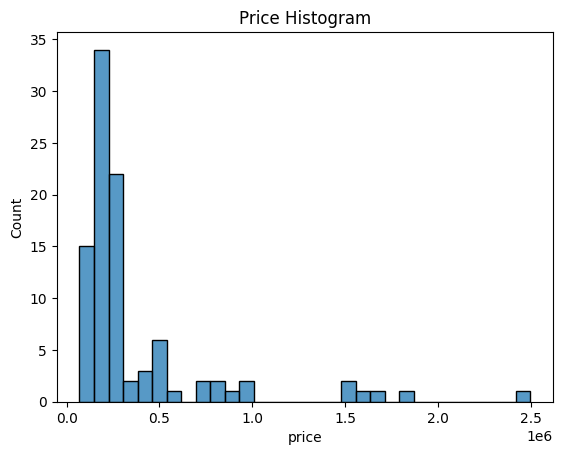

In [7]:
sns.histplot( df, x="price")
plt.title( "Price Histogram")
plt.show()

In [8]:
print( f"Minimum Price: { df[ 'price'].min()}")
print( f"Maximum Price: { df[ 'price'].max()}")

Minimum Price: 68900
Maximum Price: 2499000


In [9]:
df[ "minute"] = df[ "length"] / 60
df[ "hour"] = df[ "minute"] / 60

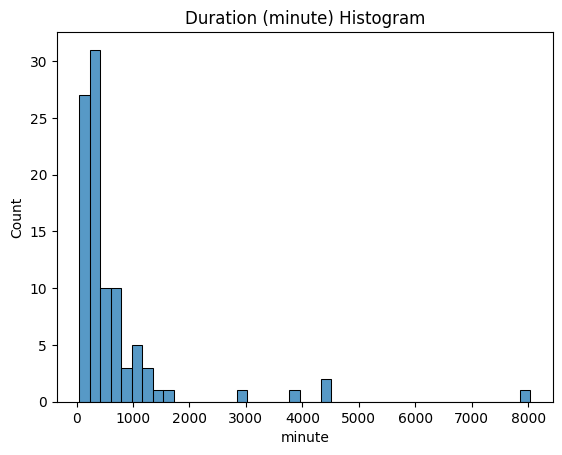

In [10]:
sns.histplot( df, x="minute")
plt.title( "Duration (minute) Histogram")
plt.show()

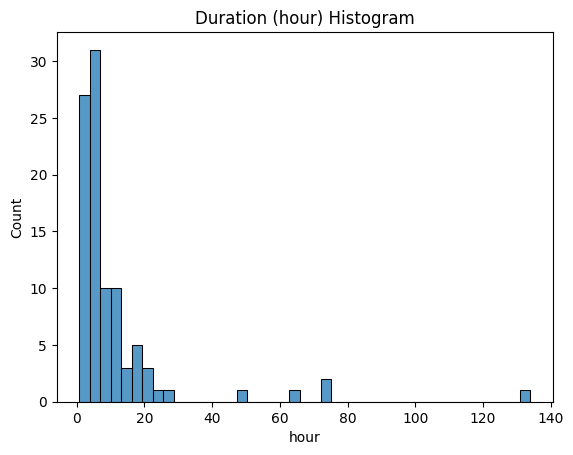

In [11]:
sns.histplot( df, x="hour")
plt.title( "Duration (hour) Histogram")
plt.show()

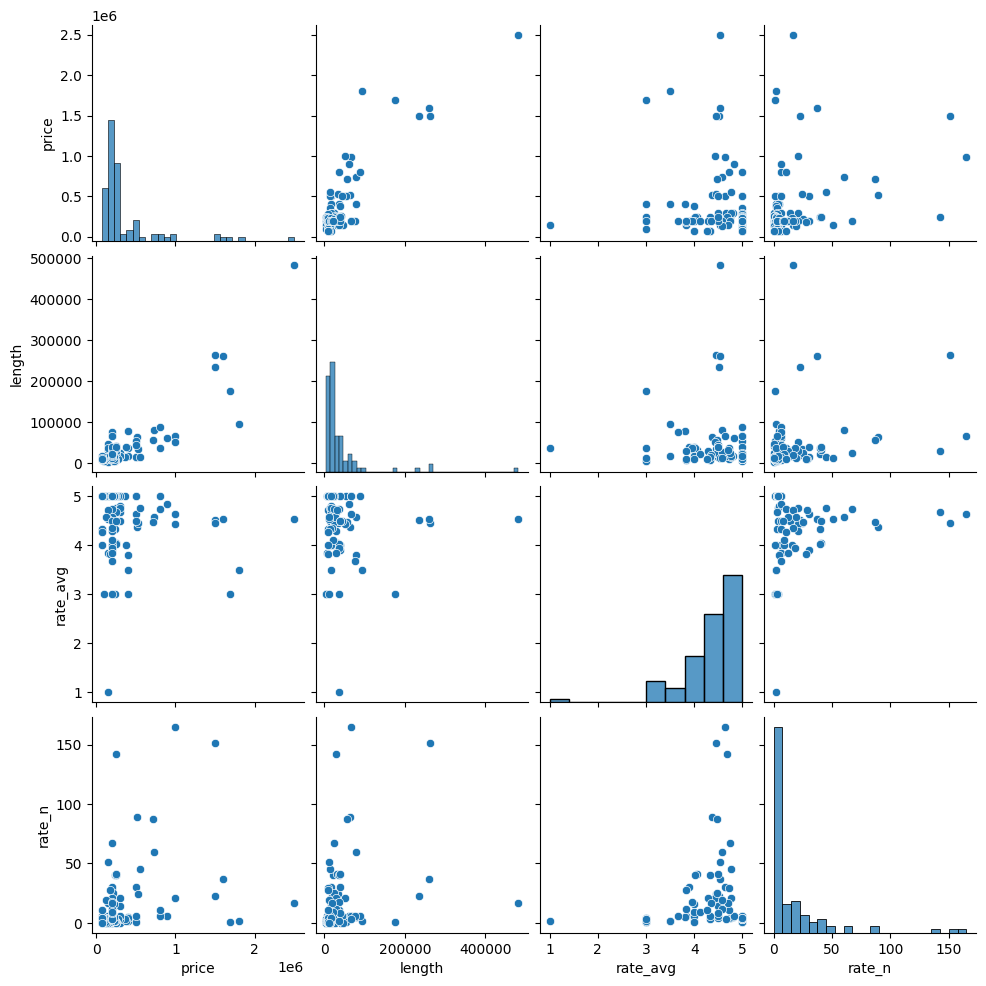

In [12]:
vars = [ "price", "length", "rate_avg", "rate_n"]
sns.pairplot( df, x_vars=vars, y_vars=vars)
plt.show()

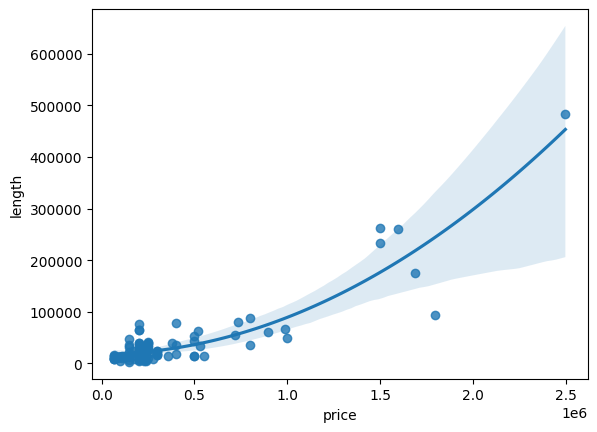

In [13]:
sns.regplot( df, x="price", y="length", order=2)
plt.show()

In [14]:
df_cat = df.groupby( "category").mean()

df_cat[ "price_per_minute"] = df_cat[ "price"] / df_cat[ "minute"]
df_cat[ "price_per_hour"] = df_cat[ "price"] / df_cat[ "hour"]

df_cat

,id,price,length,rate_avg,rate_n,minute,hour,price_per_minute,price_per_hour
category,,,,,,,,,
علوم پزشکی,84.942029,449304.347826,45639.927536,4.423347,19.724638,760.665459,12.677758,590.672736,35440.364161
فنی‌ومهندسی,29.631579,206894.736842,33601.526316,4.234384,14.315789,560.025439,9.333757,369.438105,22166.286306
نرم‌افزاری,23.250000,68900.000000,11712.500000,4.489883,3.625000,195.208333,3.253472,352.956243,21177.374600


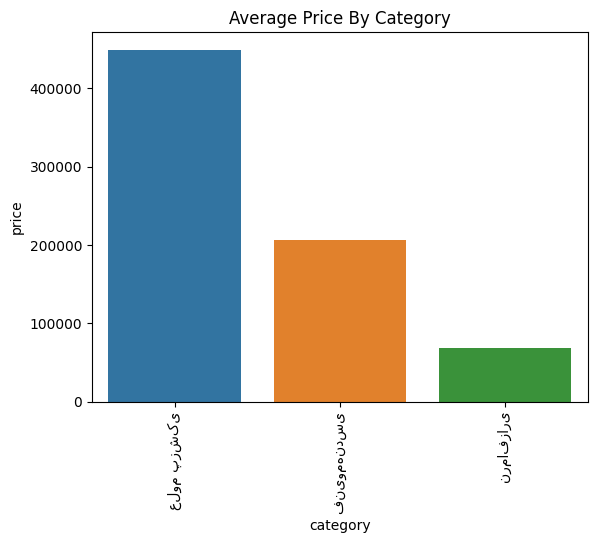

In [15]:
sns.barplot( df_cat.sort_values( "price", axis=0, ascending=False), x=df_cat.index, y="price")
plt.title( "Average Price By Category")
plt.xticks( rotation=90)
plt.show()

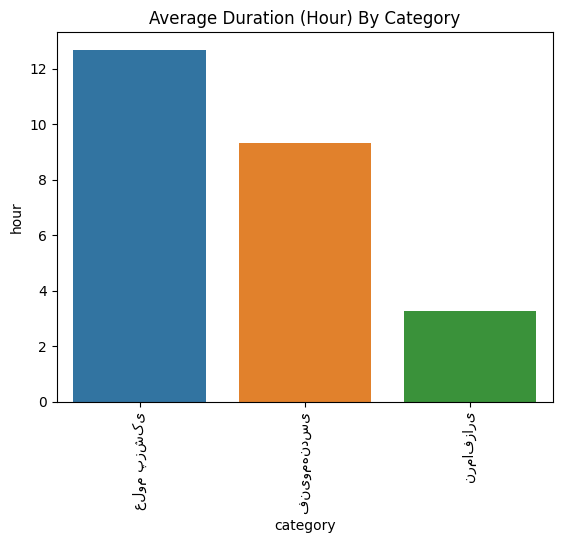

In [16]:
sns.barplot( df_cat.sort_values( "hour", axis=0, ascending=False), x=df_cat.index, y="hour")
plt.title( "Average Duration (Hour) By Category")
plt.xticks( rotation=90)
plt.show()

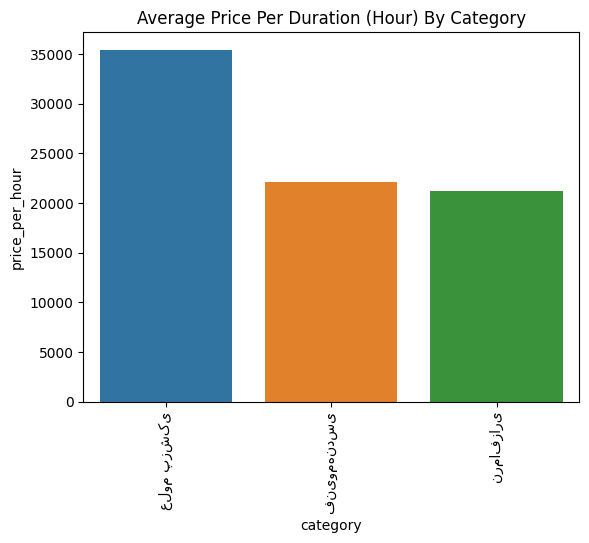

In [17]:
sns.barplot( df_cat.sort_values( "price_per_hour", axis=0, ascending=False), x=df_cat.index, y="price_per_hour")
plt.title( "Average Price Per Duration (Hour) By Category")
plt.xticks( rotation=90)
plt.show()